In [1]:
import btrdb
from btrdb import *
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# if you want to use a normal time as the start, use this command and plug the output into your start_epoch
# format is (Y,M,D,H,M,S)
dt.datetime(2019,8,7,9,45,0).timestamp()

1565196300.0

In [21]:
# Initialize settings
# test ID is title for your plot, start_epoch is start time in epoch unit
# length_min defines the length of the window you want to select data from

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
vbase_ref = 4.16/np.sqrt(3)*1000
vbase_loc = 4.16/np.sqrt(3)*1000

timestep =  1 # [seconds]

testID = 'HIL T5.0 - '
'''
4 - 1567703439.0
*3 - 1567703305.0
2 - 1567709964.0
*1 - 1567716580.0

'''
ctrl_start = 1585849646.4473288
#load_start = 1567727136.3768482
start_epoch = ctrl_start - 3*timestep # time where data actually gets pulled
#start_epoch = load_start # time where data actually gets pulled
length_min = 5



# set upmu ID's
gen3 = True # Needs to be true if gen3 uPMU streams, Flase if old (HIL1)

ref_pmu = 'upmu_0' # always upmu_0
local_pmu = 'upmu_4' # upmu_123p for inverters, upmu_4 for load racks
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

# if constant phasor target, input here
cons_Vmag = np.array([0.98,0.98,0.98])
#cons_Vang = np.array([-1.61526,-121.75103,118.20174])
cons_Vang = np.array([0-2.5,-120-2.5,120-2.5])
cons_Vmagrel = cons_Vmag-1
cons_Vangrel = cons_Vang - [0,-120,120]
cons_Vmag,cons_Vangrel

(array([0.98, 0.98, 0.98]), array([-2.5, -2.5, -2.5]))

In [22]:
#start = datetime(2019,8,1,16,19, tzinfo=timezone.utc)
#startnano = start.timestamp() * 1e9
startnano = start_epoch * 1e9
start = dt.datetime.fromtimestamp(startnano/1e9)

endnano = startnano + (length_min*60 * 1e9)
end = dt.datetime.fromtimestamp(endnano/1e9)

seconds = end-start
seconds = int(seconds.total_seconds())

print(start)
print(startnano)
print(end)
print(endnano)

2020-04-02 10:47:26.447329
1.5858496464473288e+18
2020-04-02 10:52:26.447329
1.5858499464473288e+18


In [23]:

"""
This code snippet provides variable values from the visualization tool that you can use
in a Jupyter notebook or Python script to conduct further analysis.

Please see the documentation for advanced usage and help:
https://btrdb.readthedocs.io/en/latest/
"""
'''

start = datetime(2019,8,1,16,19, tzinfo=timezone.utc)
start = start.timestamp() * 1e9
end = start + (5*60 * 1e9)

'''

# Contains variables required to query data from plotter

if gen3 == False:

    if local_pmu == 'upmu_123p':   
        CHART_VARS = {
            "all_uuids": [
            "fe2b0a79-977a-5d49-8c37-45c0191b9f20",
            "f4b15d09-15f4-5efb-acce-d26168d325c8",
            "58961ae7-4245-5287-bdb4-33d7197b18ac",
            "9576f0b0-6a19-55c9-acbc-c08c426816b5",
            "220c2466-4f3a-5c7b-9570-9f5fe0133816",
            "dfe3cab7-df13-5952-9acc-43b191a5b2f1",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
        ],
        "visible_uuids": [
            "fe2b0a79-977a-5d49-8c37-45c0191b9f20",
            "f4b15d09-15f4-5efb-acce-d26168d325c8",
            "58961ae7-4245-5287-bdb4-33d7197b18ac",
            "9576f0b0-6a19-55c9-acbc-c08c426816b5",
            "220c2466-4f3a-5c7b-9570-9f5fe0133816",
            "dfe3cab7-df13-5952-9acc-43b191a5b2f1",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 31
        }

    if local_pmu == 'upmu_4':   
        CHART_VARS = {
            "all_uuids": [
            "611cd2df-f843-531e-b8d8-f0ef620e767f",
            "0193bdee-c4bb-5126-85c4-41bb95146b8c",
            "5ce8fe71-a8a8-55c5-bd31-bdc9ac60ba51",
            "5bf29eaa-46a7-556b-84e7-89d75d6f8fed",
            "022386e4-7c70-594c-8315-bf371243f7d8",
            "57ab7fd7-ce36-58aa-b1bf-c763d6245cec",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
        ],
        "visible_uuids": [
            "611cd2df-f843-531e-b8d8-f0ef620e767f",
            "0193bdee-c4bb-5126-85c4-41bb95146b8c",
            "5ce8fe71-a8a8-55c5-bd31-bdc9ac60ba51",
            "5bf29eaa-46a7-556b-84e7-89d75d6f8fed",
            "022386e4-7c70-594c-8315-bf371243f7d8",
            "57ab7fd7-ce36-58aa-b1bf-c763d6245cec",
            "5b4d8fbb-b3f3-58ef-969a-5f77ed94f335",
            "e1c3ed55-f590-5d40-b2cc-fec893c33c3c",
            "bc1dcc85-a452-528f-9aac-9f46436f00cb",
            "e12a4ef1-f407-5fae-ab00-d7f52aca1e70",
            "2c3b326a-3745-5b2a-a633-19b3e5952a90",
            "6341cfb1-9df0-5f4b-b50e-d95f22250a0a"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 31
        }
        
if gen3 == True:
    
    if local_pmu == 'upmu_123p':
        CHART_VARS = {
            "all_uuids": [
                "4abcc6e0-5ddd-528a-8853-d0b8e2dfa13f",
                "3eee1f9a-ce3e-5006-a6a2-f9fb052a567a",
                "bdc91735-3c9f-58b5-bef1-6c0457003b79",
                "2527e342-6fd5-53c3-8295-118176286a46",
                "071e6fd8-b138-5157-9266-b5b019bfa96e",
                "15e0f3fa-6aab-59f2-bc7c-5ef77129cdb4",
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482"
            ],
            "visible_uuids": [
                "4abcc6e0-5ddd-528a-8853-d0b8e2dfa13f",
                "3eee1f9a-ce3e-5006-a6a2-f9fb052a567a",
                "bdc91735-3c9f-58b5-bef1-6c0457003b79",
                "2527e342-6fd5-53c3-8295-118176286a46",
                "071e6fd8-b138-5157-9266-b5b019bfa96e",
                "15e0f3fa-6aab-59f2-bc7c-5ef77129cdb4",
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 36
        }
    
    if local_pmu == 'upmu_4':      
        CHART_VARS = {
            "all_uuids": [
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482",
                "29aac111-6d45-5341-a5bc-8541a9c625e5",
                "745afe50-cdce-5f6d-a38a-a16c7a826669",
                "527ad75c-e5d6-55ba-a9d4-35f488a3af78",
                "dea0b773-cd23-5c31-b717-bac36e986584",
                "ec35d372-dc90-5520-a739-a8154f647486",
                "1f11eb0d-2e44-5b5b-a9dc-e3eb307f2efb"
            ],
            "visible_uuids": [
                "0f397dc0-2a77-51fd-a01b-953a16c505ca",
                "09b7e9f2-5403-5104-94dd-56a3ef5b4fd5",
                "0fc909ca-cc69-590c-a969-548eaa69ee22",
                "3d0d2549-ae8c-5d32-ba9b-dfe49ac7df8f",
                "05d384b3-93b2-5941-90a6-96617fb552dc",
                "5df3d4e5-d66a-5fe1-8898-45c4b8c1e482",
                "29aac111-6d45-5341-a5bc-8541a9c625e5",
                "745afe50-cdce-5f6d-a38a-a16c7a826669",
                "527ad75c-e5d6-55ba-a9d4-35f488a3af78",
                "dea0b773-cd23-5c31-b717-bac36e986584",
                "ec35d372-dc90-5520-a739-a8154f647486",
                "1f11eb0d-2e44-5b5b-a9dc-e3eb307f2efb"
            ],
            "start_time": {
                "iso": start,
                "epochnano": startnano
            },
            "end_time": {
                "iso": end,
                "epochnano": endnano
            },
            "resolution": 31
        }

# Configure connection to BTrDB
BTRDB_URL    = 'api.research.predictivegrid.com:4411' # or set environment variable $BTRDB_ENDPOINTS
BTRDB_APIKEY = 'DE4AD7B004A6C9EC9923C341' # or set environment variable $BTRDB_API_KEY


# Define utility functions
def get_streams(conn, filter=True, visible_only=True, chart=CHART_VARS):
    """
    Get the StreamSet for either all streams or visible streams. By default, this
    function also filters the streams by the start and end time from the chart.
    """
    key = "visible_uuids" if visible_only else "all_uuids"
    streams = conn.streams(*chart[key])

    if filter:
        streams = streams.filter(
          start=chart["start_time"]["epochnano"], end=chart["end_time"]["epochnano"]
        )

    return streams


# Connect to the database
db = btrdb.connect(BTRDB_URL, apikey=BTRDB_APIKEY)

# Query the dataset to get a DataFrame of the exported chart
streams = get_streams(db)
df = streams.to_dataframe()

In [24]:
df = df.reindex(sorted(df.columns), axis=1)
df = df.reset_index()
#dt.datetime.utcfromtimestamp(df.time.values[len(df)-1]/1e9)
print(df.shape)
df.head()

(35400, 13)


,time,energize/gen3/upmu_0/PH0ANG L1MagAng +SV,energize/gen3/upmu_0/PH0MAG L1MagAng +SV,energize/gen3/upmu_0/PH1ANG L2MagAng +SV,energize/gen3/upmu_0/PH1MAG L2MagAng +SV,energize/gen3/upmu_0/PH2ANG L3MagAng +SV,energize/gen3/upmu_0/PH2MAG L3MagAng +SV,energize/gen3/upmu_4/PH0ANG L1MagAng +SV,energize/gen3/upmu_4/PH0MAG L1MagAng +SV,energize/gen3/upmu_4/PH1ANG L2MagAng +SV,energize/gen3/upmu_4/PH1MAG L2MagAng +SV,energize/gen3/upmu_4/PH2ANG L3MagAng +SV,energize/gen3/upmu_4/PH2MAG L3MagAng +SV
0,1585849646450000014,172.411433,2401.642822,52.413547,2401.201416,-67.575344,2400.868164,173.389844,2352.722656,49.656063,2333.161865,-70.201743,2401.234619
1,1585849646458333340,172.443780,2399.842285,52.441742,2401.554443,-67.548160,2400.995117,173.396100,2353.154297,49.625129,2333.224854,-70.197945,2400.854004
2,1585849646466666666,172.441035,2399.899170,52.405774,2401.905762,-67.572120,2400.802734,173.399283,2352.435059,49.628595,2332.658203,-70.171717,2402.717285
3,1585849646474999992,172.424273,2400.873535,52.409168,2401.707275,-67.586327,2401.054688,173.407069,2353.250977,49.637010,2332.492432,-70.202972,2402.472412
4,1585849646483333318,172.427675,2400.650146,52.400849,2401.474121,-67.575180,2401.073730,173.389830,2353.027588,49.605898,2332.032959,-70.197126,2401.063477


In [25]:
ref_mag = []
ref_ang = []
local_mag = []
local_ang = []

for header in df.columns:
    if ref_pmu in header:
        if 'MAG' in header:
            ref_mag.append(header)
        if 'ANG' in header:
            ref_ang.append(header)
    if local_pmu in header:
        if 'MAG' in header:
            local_mag.append(header)
        if 'ANG' in header:
            local_ang.append(header)


In [26]:
#measured relative values

#df['rel_magL1'] = (df[local_mag[0]]/vbase_loc-df[ref_mag[0]]/vbase_ref)
#df['rel_magL2'] = (df[local_mag[1]]/vbase_loc-df[ref_mag[1]]/vbase_ref)
#df['rel_magL3'] = (df[local_mag[2]]/vbase_loc-df[ref_mag[2]]/vbase_ref)
df['rel_magL1'] = (df[local_mag[0]]/vbase_loc)
df['rel_magL2'] = (df[local_mag[1]]/vbase_loc)
df['rel_magL3'] = (df[local_mag[2]]/vbase_loc)
df['rel_angL1'] = (df[local_ang[0]]-df[ref_ang[0]])
df['rel_angL2'] = (df[local_ang[1]]-df[ref_ang[1]])
df['rel_angL3'] = (df[local_ang[2]]-df[ref_ang[2]])

rel_headers = []
for header in df.columns:
    if 'rel_' in header:
        rel_headers.append(header)
print(rel_headers)

#target relative values

Vmag_targ = np.ones((df.shape[0],3))
Vang_targ = np.ones((df.shape[0],3))

Vmag_targ[:,:] = Vmag_targ*cons_Vmag
Vang_targ[:,:] = Vang_targ*cons_Vangrel

df['targ_magL1'] = Vmag_targ[:,0]
df['targ_magL2'] = Vmag_targ[:,1]
df['targ_magL3'] = Vmag_targ[:,2]
df['targ_angL1'] = Vang_targ[:,0]
df['targ_angL2'] = Vang_targ[:,1]
df['targ_angL3'] = Vang_targ[:,2]

targ_headers = []
for header in df.columns:
    if 'targ_' in header:
        targ_headers.append(header)
print(targ_headers)

df['sec_elap'] = (df['time']-df['time'][0])/1e9
df['timesteps'] = df['sec_elap']/timestep

['rel_magL1', 'rel_magL2', 'rel_magL3', 'rel_angL1', 'rel_angL2', 'rel_angL3']
['targ_magL1', 'targ_magL2', 'targ_magL3', 'targ_angL1', 'targ_angL2', 'targ_angL3']


In [27]:
for header in rel_headers[3:5]:
    idx = df.loc[df[header]>300.].index
    if len(idx) > 0:
        if df[header][idx[0]] > 0:
            df[header][idx] = df[header][idx]-360.
        if df[header][idx[0]] > 0:
            df[header][idx] = df[header][idx]+360.

In [28]:
df.head()

,time,energize/gen3/upmu_0/PH0ANG L1MagAng +SV,energize/gen3/upmu_0/PH0MAG L1MagAng +SV,energize/gen3/upmu_0/PH1ANG L2MagAng +SV,energize/gen3/upmu_0/PH1MAG L2MagAng +SV,energize/gen3/upmu_0/PH2ANG L3MagAng +SV,energize/gen3/upmu_0/PH2MAG L3MagAng +SV,energize/gen3/upmu_4/PH0ANG L1MagAng +SV,energize/gen3/upmu_4/PH0MAG L1MagAng +SV,energize/gen3/upmu_4/PH1ANG L2MagAng +SV,...,rel_angL2,rel_angL3,targ_magL1,targ_magL2,targ_magL3,targ_angL1,targ_angL2,targ_angL3,sec_elap,timesteps
0,1585849646450000014,172.411433,2401.642822,52.413547,2401.201416,-67.575344,2400.868164,173.389844,2352.722656,49.656063,...,-2.757484,-2.626399,0.98,0.98,0.98,-2.5,-2.5,-2.5,0.000000,0.000000
1,1585849646458333340,172.443780,2399.842285,52.441742,2401.554443,-67.548160,2400.995117,173.396100,2353.154297,49.625129,...,-2.816613,-2.649786,0.98,0.98,0.98,-2.5,-2.5,-2.5,0.008333,0.008333
2,1585849646466666666,172.441035,2399.899170,52.405774,2401.905762,-67.572120,2400.802734,173.399283,2352.435059,49.628595,...,-2.777179,-2.599597,0.98,0.98,0.98,-2.5,-2.5,-2.5,0.016667,0.016667
3,1585849646474999992,172.424273,2400.873535,52.409168,2401.707275,-67.586327,2401.054688,173.407069,2353.250977,49.637010,...,-2.772159,-2.616645,0.98,0.98,0.98,-2.5,-2.5,-2.5,0.025000,0.025000
4,1585849646483333318,172.427675,2400.650146,52.400849,2401.474121,-67.575180,2401.073730,173.389830,2353.027588,49.605898,...,-2.794951,-2.621946,0.98,0.98,0.98,-2.5,-2.5,-2.5,0.033333,0.033333


In [29]:
#df = df.drop(['rel_magL1'],axis=1)
#df['sec_elap'] = (df['time']-df['time'][0])/1e9
#df.to_csv('sample_oscilations_uPMU123p')

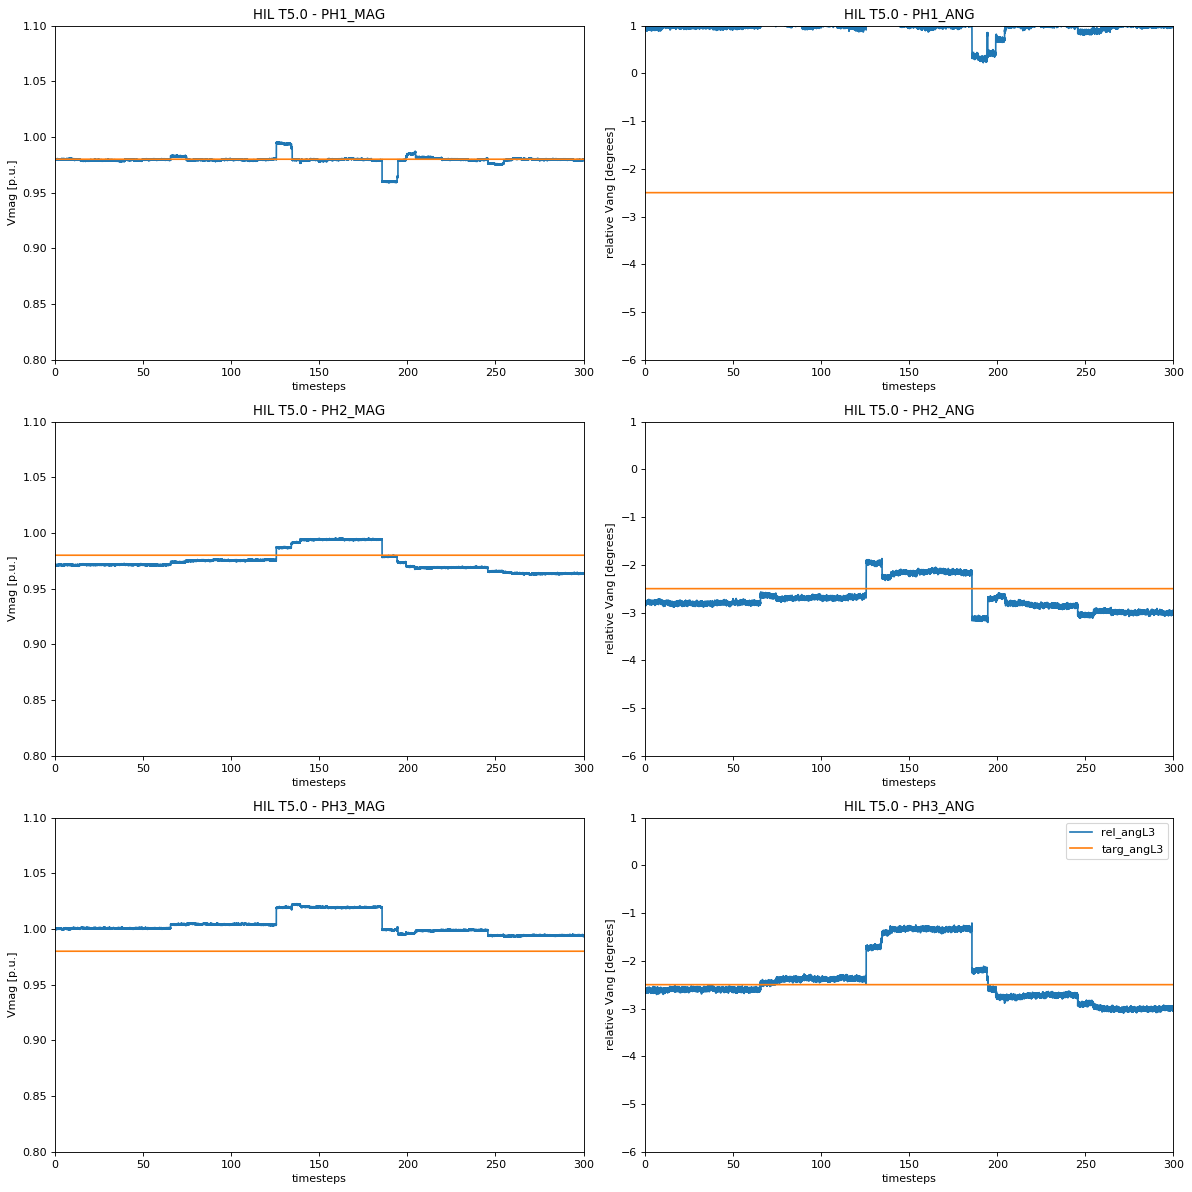

In [30]:
phase = ['PH1','PH2','PH3']

#axis settings:
#ymag_min, ymag_max = 0.98, 1.
ymag_min, ymag_max = 0.8, 1.1
#yang_min, yang_max = -1, 3
yang_min, yang_max = -6, 1
#xmin, xmax = 30,60
xmin, xmax = 0, length_min*60/timestep
#xticks = np.arange(0,600,seconds/df.shape[0])

#PLOT
plt.figure(num=1, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.subplot(3,2,i*2+1)
    plt.plot(df['timesteps'],df[rel_headers[i]])
    plt.plot(df['timesteps'],df[targ_headers[i]])
    plt.ylabel('Vmag [p.u.]')
    plt.ylim(ymag_min,ymag_max)
    plt.xlim(xmin,xmax)
    plt.title(testID + phase[i] + '_MAG')
    #plt.xticks(xticks)
    plt.xlabel('timesteps')
    plt.subplot(3,2,i*2+2)
    plt.plot(df['timesteps'],df[rel_headers[i+3]])
    plt.plot(df['timesteps'],df[targ_headers[i+3]])
    plt.ylabel('relative Vang [degrees]')
    plt.ylim(yang_min,yang_max)
    plt.xlim(xmin,xmax)
    #plt.ylim(df[targ_headers[i+3]][0]-1.5*np.abs(df[targ_headers[i+3]][0]),df[targ_headers[i+3]][0]+1.5*np.abs(df[targ_headers[i+3]][0]))
    plt.title(testID + phase[i] + '_ANG')
    #plt.xticks(xticks)
    plt.xlabel('timesteps')
plt.legend()
plt.tight_layout()
plt.show()